In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics

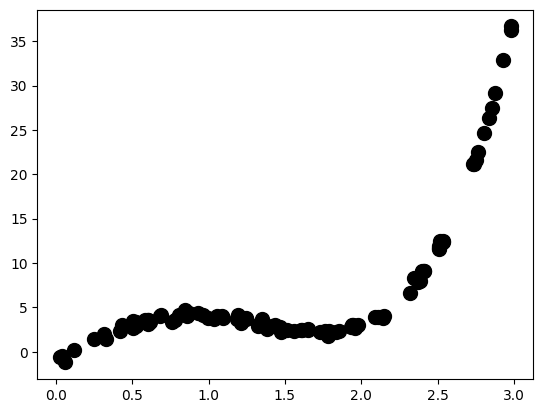

In [4]:
x = stats.uniform(0, 3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0, 0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70,) (70,)
(30,) (30,)


In [6]:
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

In [7]:
model2 = make_pipeline(PolynomialFeatures(125), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 4.08887014,  4.08887014,  4.08887014,  4.09147731,  4.08887014,
        4.0932181 ,  4.08887014,  4.08887014,  4.08887014, 22.95262441,
        4.08887021,  4.08887014,  4.08887014,  4.08887014,  4.08887014,
        4.08887014,  4.09239749,  4.35887559,  4.08887014,  4.08887014,
        4.08887014,  4.08887014,  4.08887014,  4.08887014,  4.08887019,
        4.23752882,  4.08887014,  4.08887014,  4.08887014,  4.08887014])

In [9]:
print('Explained variance score: {}'. format(metrics.explained_variance_score(y_test, model2.predict(X_test))))
print('Mediann absolute error: {}'. format(metrics.median_absolute_error(y_test, model2.predict(X_test))))
print('Mean squared error: {}'. format(metrics.mean_squared_error(y_test, model2.predict(X_test))))
print('Mean absolute errors: {}'. format(metrics.mean_absolute_error(y_test, model2.predict(X_test))))
print('Mean absolute percentage errors: {}'. format(metrics.mean_absolute_percentage_error(y_test, model2.predict(X_test))))

Explained variance score: 0.5937034178815461
Mediann absolute error: 1.358860650813936
Mean squared error: 9.419551354638944
Mean absolute errors: 2.1656668683001836
Mean absolute percentage errors: 1.3990973637987891


In [10]:
data = pd.read_csv('auto-mpg.csv')

In [11]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [14]:
data_only_cat = data.select_dtypes(include='object')
data_only_cat.head()

,horsepower,name
0,130,chevrolet chevelle malibu
1,165,buick skylark 320
2,150,plymouth satellite
3,150,amc rebel sst
4,140,ford torino


In [15]:
data_only_cat_dummies = pd.get_dummies(data_only_cat, drop_first=True, dtype=int)
data_only_cat_dummies

,horsepower_102,horsepower_103,horsepower_105,horsepower_107,horsepower_108,horsepower_110,horsepower_112,horsepower_113,horsepower_115,horsepower_116,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data.drop(list(data_only_cat), axis=1, inplace=True)

In [20]:
data = pd.concat([data, data_only_cat_dummies], axis=1)

In [21]:
data.head()

,mpg,cylinders,displacement,weight,acceleration,year,origin,horsepower_102,horsepower_103,horsepower_105,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,18.0,8,307.0,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,3693,11.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,3436,11.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,3433,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,3449,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = data.drop('mpg', axis=1)
y = data['mpg']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
